In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


Load and Prepare the MNIST Dataset

In [2]:
# Load the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.int8)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Standardize the data for models like SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# Normalize the data for Neural Network (NN)
X_train_nn = X_train / 255.0
X_test_nn = X_test / 255.0


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print('Training data shape:', X_train.shape, y_train.shape)
print('Testing data shape:', X_test.shape, y_test.shape )

Training data shape: (60000, 784) (60000,)
Testing data shape: (10000, 784) (10000,)


# Train Models and Evaluate Their Performance

In [5]:
#1.Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)


In [6]:
#2:Support Vector Machine(SVM)
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)


In [7]:
#3:k-Nearest Neighbors (k-NN)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)


In [8]:
# 4:Simple Neural Network (NN)
model = Sequential([
    Flatten(input_shape=(784,)),  # Flatten 28x28 images into 784-dimensional vectors
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_nn, y_train, epochs=5, verbose=0)

loss, accuracy_nn = model.evaluate(X_test_nn, y_test, verbose=0)
y_pred_nn = np.argmax(model.predict(X_test_nn), axis=1)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Visualize Model Performance
Plotting Accuracy

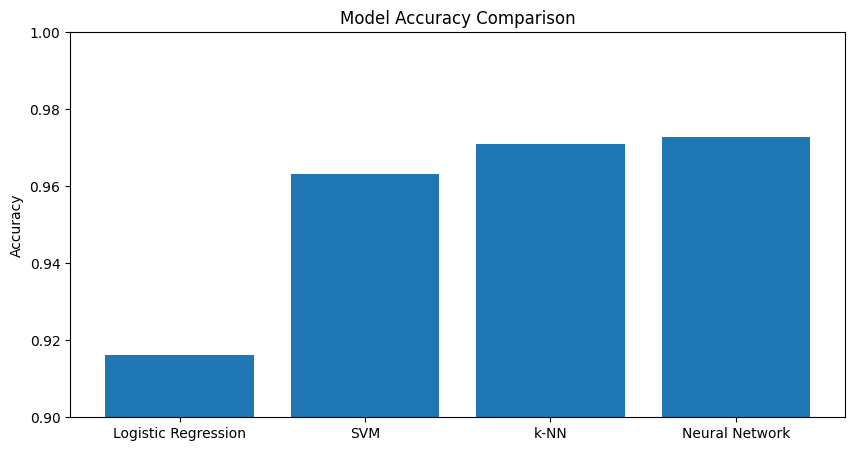

In [14]:
# Accuracy comparison
accuracies = {
    'Logistic Regression': accuracy_log_reg,
    'SVM': accuracy_svm,
    'k-NN': accuracy_knn,
    'Neural Network': accuracy_nn
}

plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()


# Summarize and FInd the Best Model

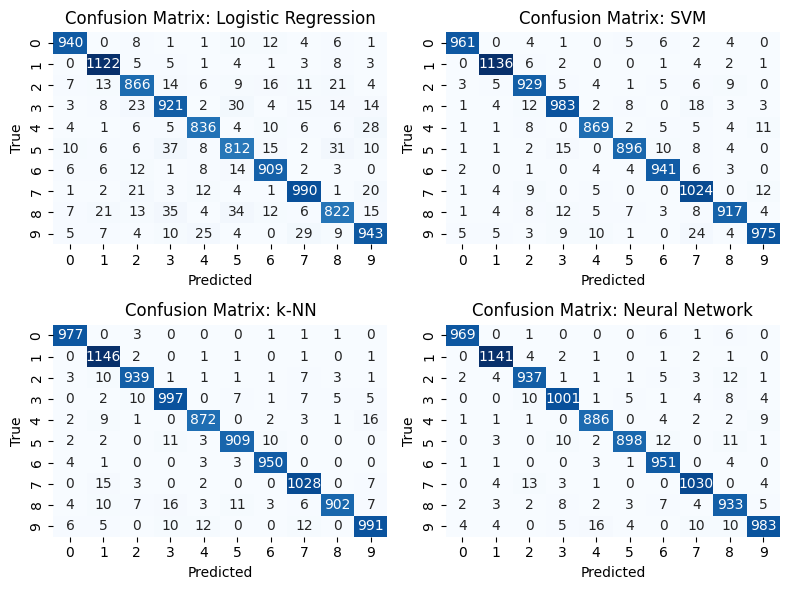

In [16]:
# Plotting confusion matrices for each model
models = {
    'Logistic Regression': conf_matrix_log_reg,
    'SVM': conf_matrix_svm,
    'k-NN': conf_matrix_knn,
    'Neural Network': conf_matrix_nn
}

plt.figure(figsize=(8, 6))
for i, (model_name, conf_matrix) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
plt.tight_layout()
plt.show()


In [11]:
#Identify best model
best_model_name = max(accuracies, key=accuracies.get)
print(f"The best model is {best_model_name} with an accuracy of {accuracies[best_model_name]:.4f}.")


The best model is Neural Network with an accuracy of 0.9729.


In [15]:
# Detailed classification report for the best model (Neural Network here)
best_model_name = 'Neural Network'
y_pred_nn = np.argmax(model.predict(X_test_nn), axis=1)
print(f"\nClassification Report for {best_model_name}:\n")
print(classification_report(y_test, y_pred_nn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report for Neural Network:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.98      0.99      0.99      1152
           2       0.97      0.97      0.97       967
           3       0.97      0.97      0.97      1034
           4       0.97      0.98      0.97       906
           5       0.98      0.96      0.97       937
           6       0.96      0.99      0.98       961
           7       0.98      0.98      0.98      1055
           8       0.95      0.96      0.95       969
           9       0.98      0.95      0.96      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

